In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from matplotlib.colors import ListedColormap

# Load the dataset
df = pd.read_csv("Zoo.csv")


First 5 rows of the dataset:
  animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   type  
0     1  
1     1  
2     4  

/tmp/ipython-input-1161142379.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='viridis')


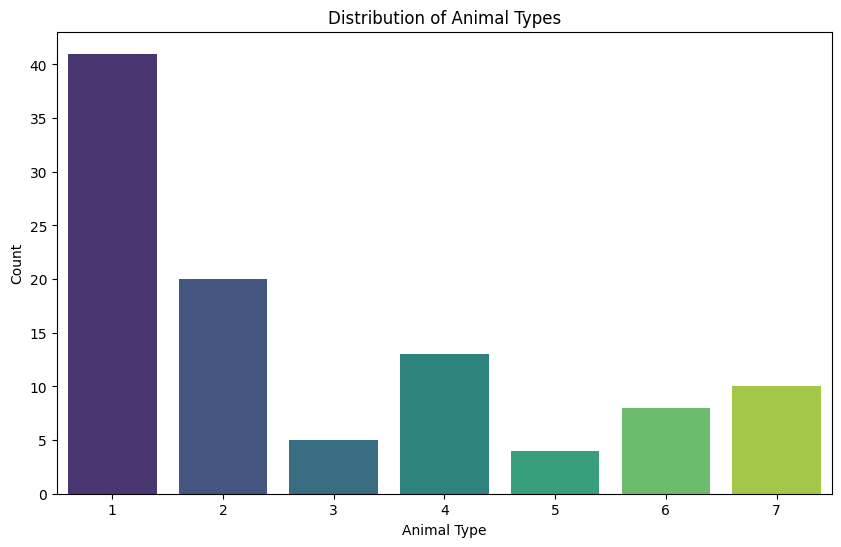

In [2]:
# 1. Analyse the data using the visualizations

print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset Info:")
df.info()

# Check for any missing values in the dataset
print("\nMissing values check:")
print(df.isnull().sum())

# Visualize the distribution of the target variable 'type'
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=df, palette='viridis')
plt.title('Distribution of Animal Types')
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.show()


In [3]:
# 2. Preprocess the data by handling missing values & Outliers, if any.

# The 'animal name' column is an identifier and not a predictive feature.
# We will drop it. 'type' is our target variable.
X = df.drop(['animal name', 'type'], axis=1)
y = df['type']

# All other features are already numeric (0 or 1), so no further encoding is needed.
# a complex outlier detection is not necessary.

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)


Features (X) shape: (101, 16)
Target (y) shape: (101,)


In [4]:
# 3. Split the dataset into training and testing sets (80% training, 20% testing).

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (80, 16)
Testing set shape: (21, 16)


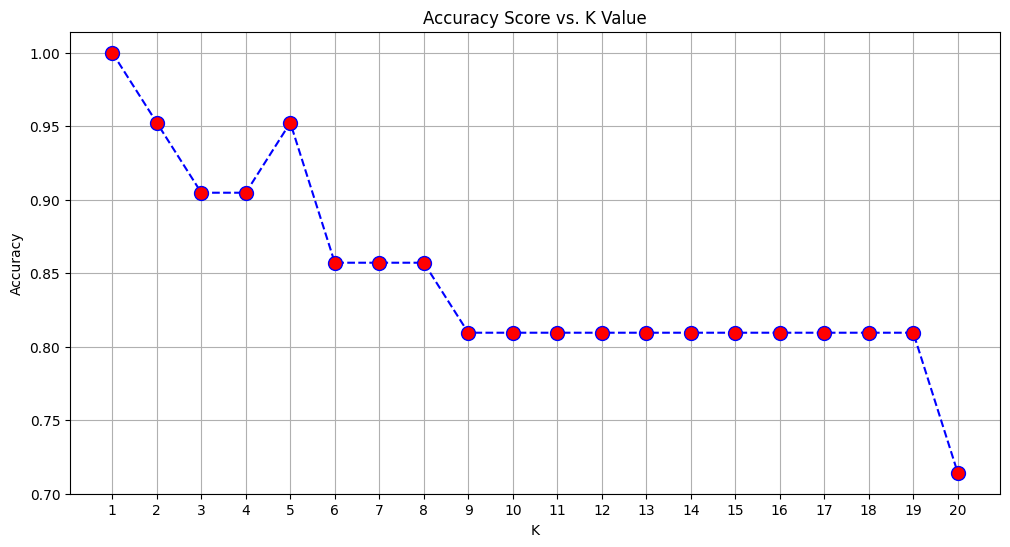

The best performance is for K = 1 with an accuracy of 1.00


KNeighborsClassifier(n_neighbors=1)

In [5]:
# 4. Implement the K-Nearest Neighbours algorithm
# 5. Choose an appropriate distance metric and value for K.

# We will test K values from 1 to 20 to find the optimal one.
k_range = range(1, 21)
accuracy_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(12, 6))
plt.plot(k_range, accuracy_scores, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Score vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Find the best K from the scores
best_k = k_range[np.argmax(accuracy_scores)]
print(f"The best performance is for K = {best_k} with an accuracy of {max(accuracy_scores):.2f}")

# Train the final model using the best K value
knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
knn_classifier.fit(X_train, y_train)


In [6]:
# 6. Evaluate the classifier's performance on the testing set

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy:.2f}")

report = classification_report(y_test, y_pred, zero_division=0)
print("\nClassification Report:")
print(report)


Accuracy on the test set: 1.00

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



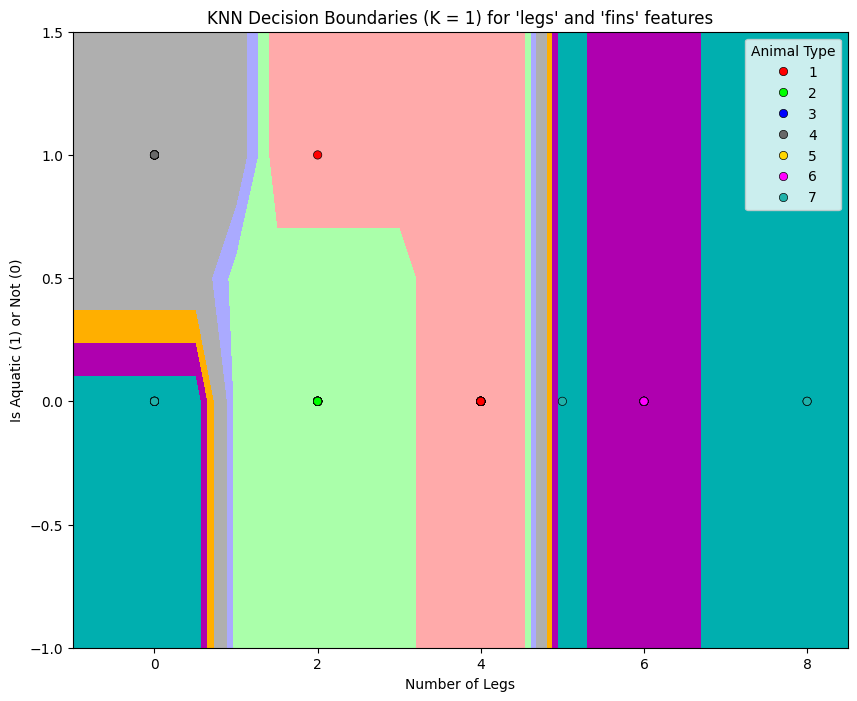

In [7]:
# 7. Visualize the decision boundaries of the classifier.

# We will select two features ('legs' and 'fins') to demonstrate the concept.
# The actual model uses all 16 features for prediction.

# Create a feature matrix and target vector with just two features
X_vis = df[['legs', 'fins']].values
y_vis = df['type'].values

# Train a new KNN model on only these two features
knn_vis = KNeighborsClassifier(n_neighbors=best_k)
knn_vis.fit(X_vis, y_vis)

# Create a mesh grid to plot the boundaries
h = .5
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict the class for each point in the mesh grid
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Define color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#AFAFAF', '#FFAF00', '#AF00AF', '#00AFAF'])
cmap_bold = ['#FF0000', '#00FF00', '#0000FF', '#696969', '#FFD700', '#FF00FF', '#20B2AA']

# Create the plot
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot the actual data points
sns.scatterplot(x=X_vis[:, 0], y=X_vis[:, 1], hue=y_vis,
                palette=cmap_bold, alpha=1.0, edgecolor="black")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"KNN Decision Boundaries (K = {best_k}) for 'legs' and 'fins' features")
plt.xlabel('Number of Legs')
plt.ylabel('Is Aquatic (1) or Not (0)')
plt.legend(title='Animal Type', loc='best')
plt.show()


**Interview Questions:**

**1. What are the key hyperparameters in KNN?**

The main hyperparameters for KNN are K (the number of neighbors to poll), the distance metric used to measure closeness, and the weight function that assigns importance to neighbors (e.g., uniformly or by distance). Finding the optimal combination of these is key to the model's performance

**2. What distance metrics can be used in KNN?**

Common distance metrics include Euclidean distance, the standard straight-line measure between two points, and Manhattan distance, which sums the absolute differences between coordinates and can be more robust in high-dimensional spaces. For categorical data, Hamming distance is used to count mismatches.
